In [1]:
# import gridded data: 
import pandas as pd
#import SD_Project as SD
import numpy as np
import gsw
import seawater as sw
import xarray as xr
#import glidertools as gt
import datetime

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#ds_disk = xr.open_dataset("saved_on_disk.nc")

#regrid_Qturb_1020=xr.open_dataset("Python/paper_plots_new/detrend/ridded_Qturb_1020.nc")
r20=xr.open_dataset("ridded_Qturb_1020.nc")
r22=xr.open_dataset("ridded_Qturb_1022.nc")
r23=xr.open_dataset("ridded_Qturb_1023.nc")


#regrid_Qturb_1020.values.plot()
#regrid_Qturb_1022=xr.open_dataset("ridded_Qturb_1022.nc")
#regrid_Qturb_1023=xr.open_dataset("paper_plots_new/detrend/ridded_Qturb_1023.nc")

In [2]:
for r in [r20, r22, r23]:
    r['Qturb']=r['__xarray_dataarray_variable__']

# Sd1020 detrend

<ipython-input-3-576b47c0dcbe>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


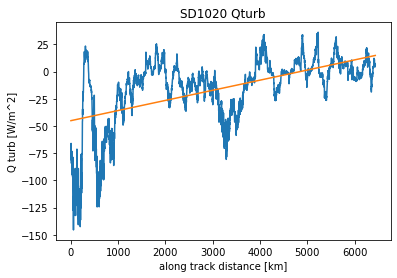

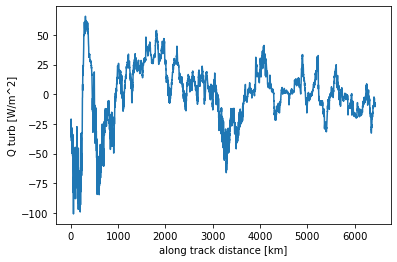

In [3]:
### detrend model :linear,  Try: No. 5
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = r20.Qturb[1:]#read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.title('SD1020 Qturb')
pyplot.xlabel('along track distance [km]')
pyplot.ylabel('Q turb [W/m^2]')

pyplot.show()
# detrend
detrended20 = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended20)
pyplot.xlabel('along track distance [km]')
pyplot.ylabel('Q turb [W/m^2]')
pyplot.show()

In [4]:
'''
Calculate the autocovarriance and autocorrelation coefficients.
'''

import numpy as np

def autocovariance(Xi, N, k, Xs):
    autoCov = 0
    for i in np.arange(0, N-k):
        autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
    return (1/(N-1))*autoCov

def autocorrelation():
    return autocovariance(Xi, N, k, Xs) / autocovariance(Xi, N, 0, Xs)

Xi = r20.Qturb[~np.isnan(r20.Qturb)].values #there is just onenan in the beginning
N = np.size(Xi)
Xs = np.average(Xi)
autocorr_pt=[]
autocovar_pt=[]
l= np.size(Xi)-1 
a0=  autocovariance(Xi, N, 0, Xs)
for i in np.arange(l):
     
    autocovar= autocovariance(Xi, N, i, Xs)
    autocorr_pt.append(autocovar/a0)

Xi = detrended20#[1:]#Q_turb_p0#.values
N = np.size(Xi)
Xs = np.average(Xi)
autocorr_20detrend=[]
autocovar_20detrend=[]
l= np.size(Xi)-1 
a0=  autocovariance(Xi, N, 0, Xs)
for i in np.arange(l):
     
    autocovar= autocovariance(Xi, N, i, Xs)
    autocorr_20detrend.append(autocovar/a0)

(0.0, 500.0)

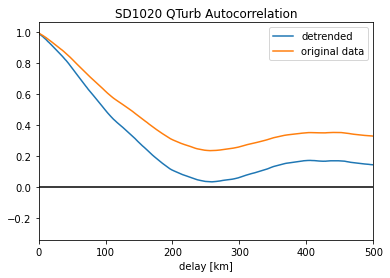

In [5]:
plt.plot(autocorr_20detrend, label='detrended')
plt.plot(autocorr_pt, label='original data')
plt.legend()
plt.title('SD1020 QTurb Autocorrelation')
plt.xlabel('delay [km]')
plt.axhline(0, c='k')
plt.xlim(0,500)
#plt.savefig("Autocorrlation_Sd102Q_turb_detrendlinear_new_zoom.jpg", bbox_inches='tight', transparent=False)

# SD1022 detrend Q turb

<ipython-input-6-73280bac5891>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


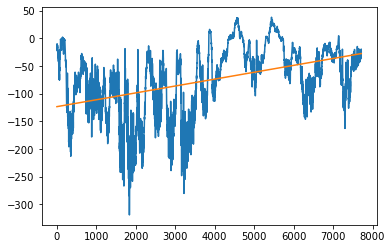

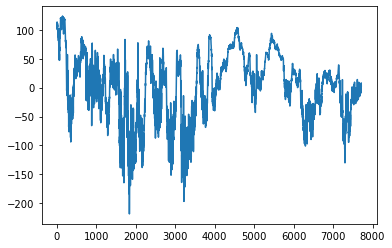

In [6]:
### detrend model :linear,  Try: No. 5
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = r22.Qturb[~np.isnan(r22.Qturb)]#read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended_22 = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended_22)
pyplot.show()

In [7]:
Xi=r22.Qturb[~np.isnan(r22.Qturb)].values
N = np.size(Xi)
Xs = np.average(Xi)
autocorr_22=[]
l= np.size(Xi)-1 
a0=  autocovariance(Xi, N, 0, Xs)

for i in np.arange(l):
    autocovar= autocovariance(Xi, N, i, Xs)
    autocorr_22.append(autocovar/a0)

In [8]:
Xi = detrended_22#Q_turb_p0#.values
N = np.size(Xi)
Xs = np.average(Xi)
autocorr_22detrend=[]
autocovar_22detrend=[]
l= np.size(Xi)-1 
a0=  autocovariance(Xi, N, 0, Xs)
for i in np.arange(l):
    autocovar= autocovariance(Xi, N, i, Xs)
    autocorr_22detrend.append(autocovar/a0)


(0.0, 500.0)

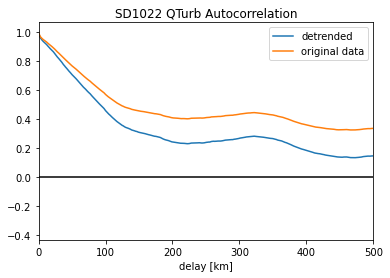

In [9]:
plt.plot(autocorr_22detrend, label='detrended')
plt.plot(autocorr_22, label='original data')
plt.legend()
plt.title('SD1022 QTurb Autocorrelation')
plt.xlabel('delay [km]')
plt.axhline(0, c='k')
plt.xlim(0,500)
#plt.savefig("Autocorrlation_Sd1022Q_turb_detrendlinear_new_zoom.jpg", bbox_inches='tight', transparent=False)

# SD1023 detrend

<ipython-input-10-cfcfb649adb5>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


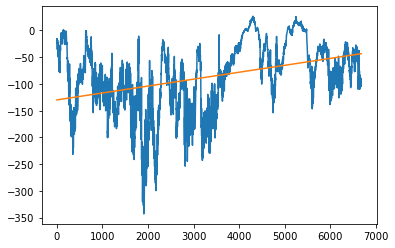

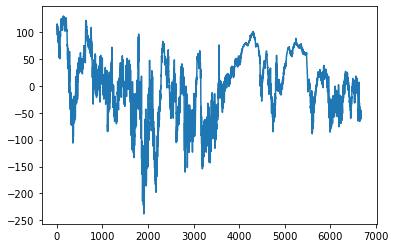

In [10]:
### detrend model :linear,  Try: No. 5
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = r23.Qturb[~np.isnan(r23.Qturb)]#read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended23 = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended23)
pyplot.show()

In [11]:
Xi=r23.Qturb[~np.isnan(r23.Qturb)].values
N = np.size(Xi)
Xs = np.average(Xi)
autocorr_23=[]
l= np.size(Xi)-1 
a0=  autocovariance(Xi, N, 0, Xs)

for i in np.arange(l):
    autocovar= autocovariance(Xi, N, i, Xs)
    autocorr_23.append(autocovar/a0)

In [12]:
Xi = detrended23#Q_turb_p0#.values
N = np.size(Xi)
Xs = np.average(Xi)
autocorr_23detrend=[]
autocovar_23detrend=[]
l= np.size(Xi)-1 
a0=  autocovariance(Xi, N, 0, Xs)
for i in np.arange(l):
    autocovar= autocovariance(Xi, N, i, Xs)
    autocorr_23detrend.append(autocovar/a0)

(0.0, 500.0)

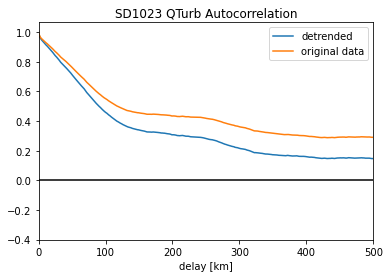

In [13]:
plt.plot(autocorr_23detrend, label='detrended')
plt.plot(autocorr_23, label='original data')
plt.legend()
plt.title('SD1023 QTurb Autocorrelation')
plt.xlabel('delay [km]')
plt.axhline(0, c='k')
plt.xlim(0,500)
#plt.savefig("Autocorrlation_Sd1023Q_turb_detrendlinear_new_zoom.jpg", bbox_inches='tight', transparent=False)

In [14]:
############################################
#ERA5 data 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 

filepath2='C:/Users/Hanna/Python/download_heatcomponents_heatbudget280720.nc'

ERA5_new=xr.open_dataset(filepath2)
era_sens= ERA5_new.sshf
era_lat= ERA5_new.slhf



In [15]:
##### TEST IF SD1022 and SD1023 are the same
import scipy 

a= autocorr_22detrend
b= autocorr_23detrend
c= autocorr_20detrend
scipy.stats.mannwhitneyu(a, b, use_continuity=False, alternative='two-sided')#, axis=0, method='auto', *, nan_policy='propagate')

MannwhitneyuResult(statistic=25727103.5, pvalue=0.9041193936766863)

(0.0, 550.0)

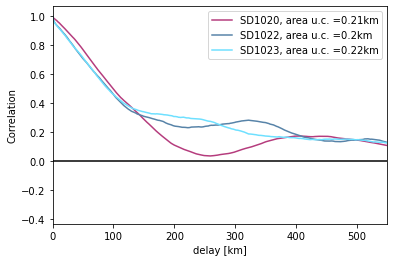

In [29]:
#################################FIg S3 for appendix
## Autocorrelation for  all three Saildrones detrended 
col=['#b53c7d',"#5783a8","#6ee0ff"]# colors from Map ( blues and purple)
def area_under_curve_zerocrossing(ys):
    
    zero=np.where(np.array(ys) < 0)[0][0]
    xs=np.arange(0, 1, 1/zero)
    return np.trapz(ys[:zero], xs)

plt.plot(autocorr_20detrend, label='SD1020, area u.c. =' + str(np.round(area_under_curve_zerocrossing(autocorr_20detrend), 2))+'km', color=col[0])
plt.plot(autocorr_22detrend, label='SD1022, area u.c. =' + str(np.round(area_under_curve_zerocrossing(autocorr_22detrend), 2))+'km', color=col[1])

plt.plot(autocorr_23detrend, label='SD1023, area u.c. =' + str(np.round(area_under_curve_zerocrossing(autocorr_23detrend), 2))+'km', color=col[2])
plt.axhline(0, c='k')
plt.legend()
plt.xlabel('delay [km]')
plt.ylabel('Correlation')
plt.xlim(0,550)

#plt.savefig("Autocorrlation_apendix_zoom.svg", bbox_inches='tight', transparent=False)

In [14]:
# create plot with ERA5 path of SD1020 at diffrent seasons 
# step1: get SD1020 path


i=0
era_path_sens= era_sens.sel(latitude=traj_tubles[i][0],longitude=traj_tubles[i][1], method='nearest')
era_path_lat= era_lat.sel(latitude=traj_tubles[i][0],longitude=traj_tubles[i][1], method='nearest')



Q_turb_p0= xr.DataArray((era_path_sens/3600)+(era_path_lat/3600),
                    dims=['time'])#,
                    #coords={'dist':np.insert(d,0,0)})
    
#plt.plot(Q_turb_p0)
Xi = Q_turb_p0.values
N = np.size(Xi)
Xs = np.average(Xi)
autocorr_t0=[]
autocovar_t0=[]
l= np.size(Xi)-1 
for i in np.arange(l):
    autocovar_t0.append(autocovariance(Xi, N, i, Xs))
    autocorr_t0.append(autocovariance(Xi, N, i, Xs)/ autocovariance(Xi, N, 0, Xs))
    
a0=autocorr_t0

i=173
era_path_sens= era_sens.sel(latitude=traj_tubles[i][0],longitude=traj_tubles[i][1], method='nearest')
era_path_lat= era_lat.sel(latitude=traj_tubles[i][0],longitude=traj_tubles[i][1], method='nearest')



Q_turb_p0= xr.DataArray((era_path_sens/3600)+(era_path_lat/3600),
                    dims=['time'])
                    
    
#plt.plot(Q_turb_p0)
Xi = Q_turb_p0.values
N = np.size(Xi)
Xs = np.average(Xi)
autocorr_t1=[]
autocovar_t1=[]
l= np.size(Xi)-1 
for i in np.arange(l):
    autocovar_t1.append(autocovariance(Xi, N, i, Xs))
    autocorr_t1.append(autocovariance(Xi, N, i, Xs)/ autocovariance(Xi, N, 0, Xs))
a1= autocorr_t1    
    
i=286
era_path_sens= era_sens.sel(latitude=traj_tubles[i][0],longitude=traj_tubles[i][1], method='nearest')
era_path_lat= era_lat.sel(latitude=traj_tubles[i][0],longitude=traj_tubles[i][1], method='nearest')
Q_turb_p0= xr.DataArray((era_path_sens/3600)+(era_path_lat/3600),
                    dims=['time'])
Xi = Q_turb_p0.values
N = np.size(Xi)
Xs = np.average(Xi)
autocorr_t2=[]
autocovar_t2=[]
l= np.size(Xi)-1 
for i in np.arange(l):
    autocovar_t2.append(autocovariance(Xi, N, i, Xs))
    autocorr_t2.append(autocovariance(Xi, N, i, Xs)/ autocovariance(Xi, N, 0, Xs))
a2=autocorr_t2

i=321
era_path_sens= era_sens.sel(latitude=traj_tubles[i][0],longitude=traj_tubles[i][1], method='nearest')
era_path_lat= era_lat.sel(latitude=traj_tubles[i][0],longitude=traj_tubles[i][1], method='nearest')
Q_turb_p0= xr.DataArray((era_path_sens/3600)+(era_path_lat/3600),
                    dims=['time'])
Xi = Q_turb_p0.values
N = np.size(Xi)
Xs = np.average(Xi)
autocorr_t3=[]
autocovar_t3=[]
l= np.size(Xi)-1 
for i in np.arange(l):
    autocovar_t3.append(autocovariance(Xi, N, i, Xs))
    autocorr_t3.append(autocovariance(Xi, N, i, Xs)/ autocovariance(Xi, N, 0, Xs))
a3=autocorr_t3


i=431
era_path_sens= era_sens.sel(latitude=traj_tubles[i][0],longitude=traj_tubles[i][1], method='nearest')
era_path_lat= era_lat.sel(latitude=traj_tubles[i][0],longitude=traj_tubles[i][1], method='nearest')
Q_turb_p0= xr.DataArray((era_path_sens/3600)+(era_path_lat/3600),
                    dims=['time'])
                    
    
#plt.plot(Q_turb_p0)
Xi = Q_turb_p0.values
N = np.size(Xi)
Xs = np.average(Xi)
autocorr_t4=[]
autocovar_t4=[]
l= np.size(Xi)-1 
for i in np.arange(l):
    autocovar_t4.append(autocovariance(Xi, N, i, Xs))
    autocorr_t4.append(autocovariance(Xi, N, i, Xs)/ autocovariance(Xi, N, 0, Xs))
a4=autocorr_t4

NameError: name 'era_sens' is not defined

In [ ]:
## thoughts on this: 
# How can we directly compare to SD data to Era5? 
# ERA5 in km: along path, fixed time, diffrent start times  


Text(0, 0.5, 'autocorrelation')

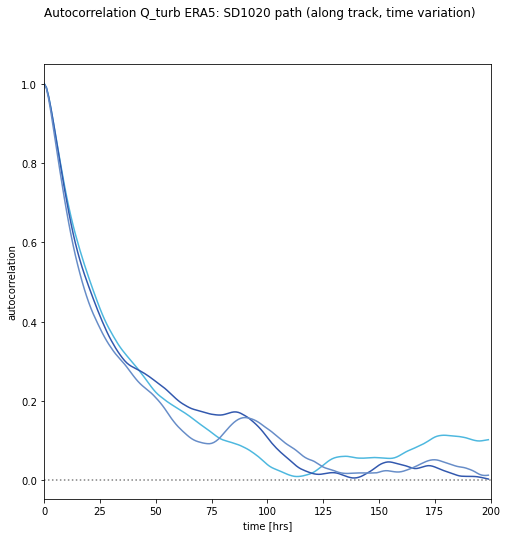

In [211]:

fig, a = plt.subplots(1,1, figsize=(8, 8))
fig.suptitle('Autocorrelation Q_turb ERA5: SD1020 path (along track, time variation)')

blues= ["#5288e8","#4db8df","#3258ae","#678dc8","#2a447a"]

#a.plot(autocorr_t0[:200],label='loc1', c=blues[0])
a.plot(autocorr_t1[:200],label='loc2', c=blues[1])
a.plot(autocorr_t2[:200],label='loc3', c=blues[2])
a.plot(autocorr_t3[:200],label='loc4', c=blues[3])

#a.plot(a_grid25km [:200], c = 'r')
a.axhline(0,linestyle='dotted', color='grey')
a.set_xlim(0, 200)
a.set_xlabel('time [hrs]')
a.set_ylabel('autocorrelation')

## TEMPORAL AUTOCORLLEATION;

In [12]:
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

time_cut_20 = [dt.strftime('%Y-%m-%d %H:%M ') for dt in 
       datetime_range(datetime(2019, 2, 8, 15, 50), datetime(2019, 3, 26, 13, 50), 
       timedelta(minutes=1))]
time_cut_22=[dt.strftime('%Y-%m-%d %H:%M ') for dt in 
       datetime_range(datetime(2019, 5, 10, 4, 0), datetime(2019, 5, 10, 4, 0)+timedelta(days=45, hours=2), 
       timedelta(minutes=1))]

In [13]:
##########################################Packages:
import numpy as np
import matplotlib.pyplot as plt

#############------AUTOCORREATION TEMPORAL---------
#load data from other notebook: 

#Trublent Heatflux from 1020, 1022, cut from 45days 
Qturb_cut_20= np.loadtxt('Qturb_cut_20.txt')
Qturb_cut_22= np.loadtxt('Qturb_cut_22.txt')

#LOAD PATHs from SD1020 and SD1022: 
traj_tubles20= np.loadtxt('traj_tubles_1020.txt')
traj_tubles22= np.loadtxt('traj_tubles_1022.txt')

#6 chosen postions to extract from ERA5: 
pos20= np.loadtxt('pos_1020.txt')
pos22= np.loadtxt('pos_1022.txt')
#pos22= pos22[1:]

In [ ]:
##### chose ERA5 positions: 
#Q_turb_months22=[]
#for t in range(1,10):
 #   Q_turb_month22=[]
 #   for i in range(len(traj_tubles22)):
 #       era_path_sens22= era_sens.sel(time=datetime(2019,t,1)).sel(latitude=traj_tubles22[i][0],longitude=traj_tubles22[i][1], method='nearest')
 #       era_path_lat22= era_lat.sel(time=datetime(2019,t,1)).sel(latitude=traj_tubles22[i][0],longitude=traj_tubles22[i][1], method='nearest')
#        Q_turb_month22.append((era_path_sens22.values/3600)+(era_path_lat22.values/3600))
 #   Q_turb_months22.append(Q_turb_month22)

In [15]:
Qturb_cut_20_hourly = Qturb_cut_20[::60]
Qturb_cut_22_hourly = Qturb_cut_22[::60]

def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]
nans, t= nan_helper(Qturb_cut_20_hourly)
Qturb_cut_20_hourly[nans]= np.interp(t(nans), t(~nans), Qturb_cut_20_hourly[~nans])

nans, t= nan_helper(Qturb_cut_22_hourly)
Qturb_cut_22_hourly[nans]= np.interp(t(nans), t(~nans), Qturb_cut_22_hourly[~nans])

In [16]:
import numpy as np

def autocovariance(Xi, N, k, Xs):
    autoCov = 0
    for i in np.arange(0, N-k):
        autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
    return (1/(N-1))*autoCov

def autocorrelation():
    return autocovariance(Xi, N, k, Xs) / autocovariance(Xi, N, 0, Xs)

In [17]:
#Autocorrelations with minutely SD data: 
# autocorrelation
Qturb_cut_20_autocor = []
Xi = Qturb_cut_20_hourly
N = np.size(Xi)
Xs = np.average(Xi)
autocorr_tgd=[]
autocovar_tgd=[]
l= np.size(Xi) 
for i in np.arange(l):
        #autocovar_tgd.append(autocovariance(Xi, N, i, Xs))
    Qturb_cut_20_autocor.append(autocovariance(Xi, N, i, Xs)/ autocovariance(Xi, N, 0, Xs))

Qturb_cut_22_autocor = []
Xi = Qturb_cut_22_hourly
N = np.size(Xi)
Xs = np.average(Xi)
autocorr_tgd=[]
autocovar_tgd=[]
l= np.size(Xi) 
for i in np.arange(l):
        #autocovar_tgd.append(autocovariance(Xi, N, i, Xs))
    Qturb_cut_22_autocor.append(autocovariance(Xi, N, i, Xs)/ autocovariance(Xi, N, 0, Xs))
    
#Qturb_cut_20_autocor.append(autocorr_tgd)

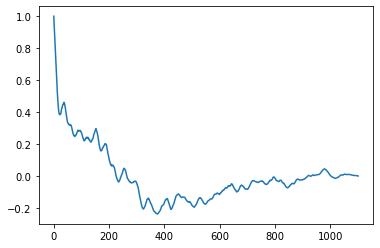

In [18]:
plt.plot(Qturb_cut_22_autocor)

In [19]:
# datetime.datetime(2019, 2, 8, 15, 50) to datetime.datetime(2019, 3, 26, 13, 50)

Q_turb_20_locs=[]
for p in pos20:
    Q_turb_20_locs.append(era_sens.sel(latitude=p[0],longitude=p[1], method='nearest').sel(time=(slice(datetime(2019, 2, 8, 15, 50),datetime(2019, 3, 26, 13, 50)))).values/3600 +
                            era_lat.sel(latitude=p[0],longitude=p[1], method='nearest').sel(time=(slice(datetime(2019, 2, 8, 15, 50),datetime(2019, 3, 26, 13, 50)))).values/3600)
Q_turb_22_locs=[]
for p in pos22:
    Q_turb_22_locs.append(era_sens.sel(latitude=p[0],longitude=p[1], method='nearest').sel(time=(slice(datetime(2019, 2, 8, 15, 50),datetime(2019, 3, 26, 13, 50)))).values/3600 +
                            era_lat.sel(latitude=p[0],longitude=p[1], method='nearest').sel(time=(slice(datetime(2019, 2, 8, 15, 50),datetime(2019, 3, 26, 13, 50)))).values/3600)


In [20]:
# autocorrelation
a_temp1h_20 = []
for Xi in Q_turb_20_locs:
    #Xi = Q_turb_months_1km[t]
    N = np.size(Xi)
    Xs = np.average(Xi)
    autocorr_tgd=[]
    autocovar_tgd=[]
    l= np.size(Xi) 
    for i in np.arange(l):
        autocovar_tgd.append(autocovariance(Xi, N, i, Xs))
        autocorr_tgd.append(autocovariance(Xi, N, i, Xs)/ autocovariance(Xi, N, 0, Xs))

    a_temp1h_20.append(autocorr_tgd)
    
# autocorrelation
a_temp1h_22 = []
for Xi in Q_turb_22_locs:
    #Xi = Q_turb_months_1km[t]
    N = np.size(Xi)
    Xs = np.average(Xi)
    autocorr_tgd=[]
    autocovar_tgd=[]
    l= np.size(Xi) 
    for i in np.arange(l):
        autocovar_tgd.append(autocovariance(Xi, N, i, Xs))
        autocorr_tgd.append(autocovariance(Xi, N, i, Xs)/ autocovariance(Xi, N, 0, Xs))

    a_temp1h_22.append(autocorr_tgd)

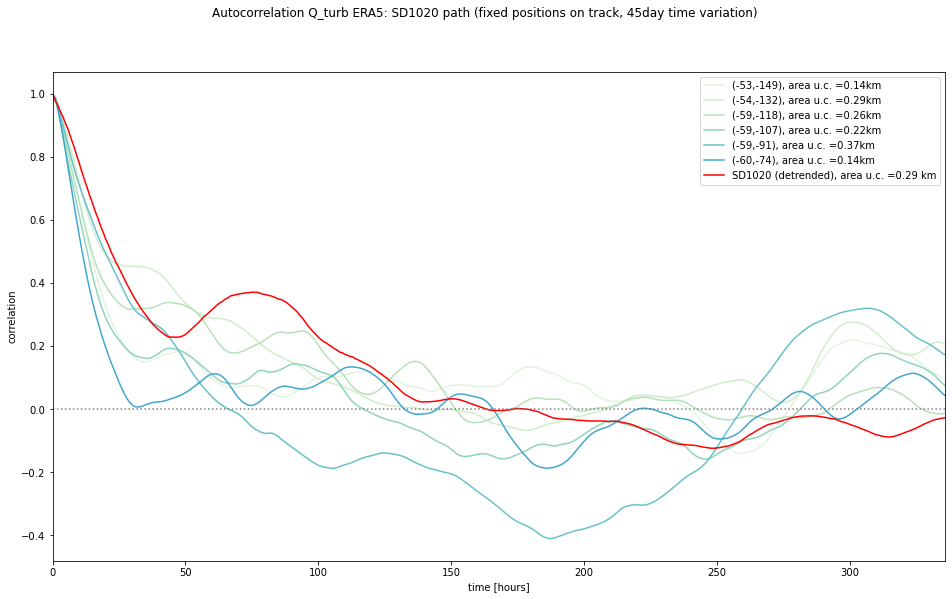

In [26]:
def area_under_curve_zerocrossing(ys):
    
    zero=np.where(np.array(ys) < 0)[0][0]
    xs=np.arange(0, 1, 1/zero)
    return np.trapz(ys[:zero], xs)

fig=plt.figure(figsize=(16,9))#col=plot_color_gradients('Qualitative')

#colors = list([plt.cm.rainbow(i) for i in range(9)])
n = 10
colors = plt.cm.GnBu(np.linspace(0,1,n))

for i,p in enumerate(pos20):
    plt.plot(a_temp1h_20[i], label='(%i,%i), area u.c. ='%(p[0],p[1]) + str(np.round(area_under_curve_zerocrossing(a_temp1h_20[i]), 2))+'km' ,linewidth=1.5,c=colors[i+1])#c=(0.2,0.2,(i+1)/10+(i+1)/100),alpha=(i+1)/10)

    
plt.plot(Qturb_cut_20_autocor, color='r', label='SD1020 (detrended), area u.c. ='+ str(np.round(area_under_curve_zerocrossing(Qturb_cut_20_autocor), 2))+' km')
#plt.plot(Qturb_cut_22_autocor, color='r',linestyle='--', label='SD1022 (detrended), area u.c. ='+ str(np.round(area_under_curve_zerocrossing(Qturb_cut_22_autocor), 2))+' km')
plt.legend(loc='upper right')
plt.axhline(0,linestyle='dotted', color='grey')
#plt.xlim(0,2000)
plt.xlabel('time [hours]')
plt.ylabel('correlation')
plt.xlim(0,336)

fig.suptitle('Autocorrelation Q_turb ERA5: SD1020 path (fixed positions on track, 45day time variation)')
plt.savefig("Autocorr_Sd1020Q_turb_fixedloc_timeseries.jpg", bbox_inches='tight', transparent=False)
####METHODS : used era5 data, extracted SD path, with nearest grid points, gridded new Qturb to 25km resolution, fixed time but dirrerent 
### SD data is detrended Qturb data

In [79]:
#area_under_curve_zerocrossing(a_temp1h_22[2])

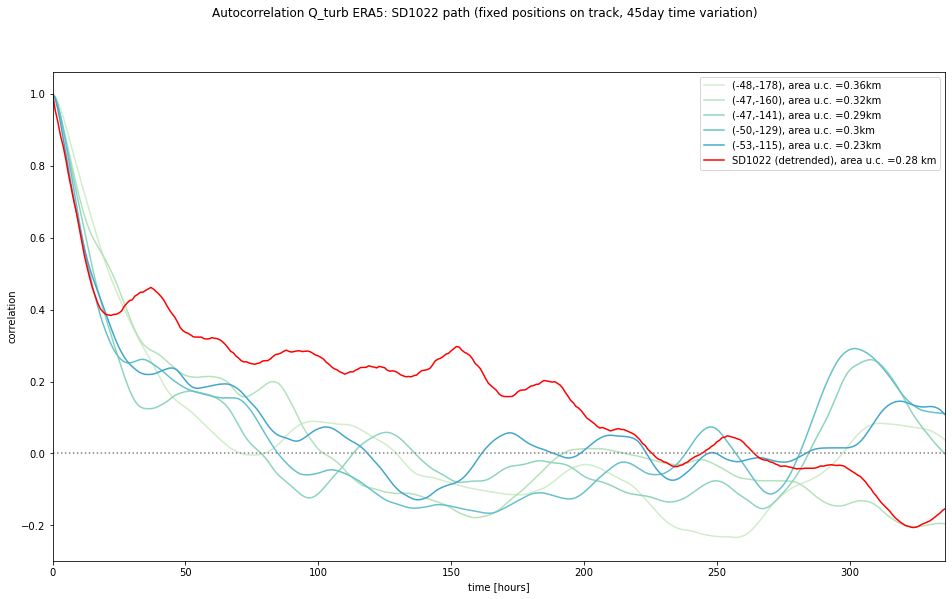

In [25]:
def area_under_curve_zerocrossing(ys):
    
    zero=np.where(np.array(ys) < 0)[0][0]
    xs=np.arange(0, 1, 1/zero)
    if len(ys[:zero])== len(xs):
        return np.trapz(ys[:zero], xs)
    else:
        return np.trapz(ys[:zero+1], xs)

fig=plt.figure(figsize=(16,9))#col=plot_color_gradients('Qualitative')

#colors = list([plt.cm.rainbow(i) for i in range(9)])
n = 10
colors = plt.cm.GnBu(np.linspace(0,1,n))
pos22= np.loadtxt('pos_1022.txt')

for i,p in enumerate(pos22):
    if i==0:
        continue
    plt.plot(a_temp1h_22[i], label='(%i,%i), area u.c. ='%(p[0],p[1]) + str(np.round(area_under_curve_zerocrossing(a_temp1h_22[i]), 2))+'km' ,linewidth=1.5,c=colors[i+1])#c=(0.2,0.2,(i+1)/10+(i+1)/100),alpha=(i+1)/10)

    
plt.plot(Qturb_cut_22_autocor, color='r', label='SD1022 (detrended), area u.c. ='+ str(np.round(area_under_curve_zerocrossing(Qturb_cut_22_autocor), 2))+' km')
#plt.plot(Qturb_cut_22_autocor, color='r',linestyle='--', label='SD1022 (detrended), area u.c. ='+ str(np.round(area_under_curve_zerocrossing(Qturb_cut_22_autocor), 2))+' km')
plt.legend(loc='upper right')
plt.axhline(0,linestyle='dotted', color='grey')
#plt.xlim(0,2000)
plt.xlabel('time [hours]')
plt.ylabel('correlation')
plt.xlim(0,336)
fig.suptitle('Autocorrelation Q_turb ERA5: SD1022 path (fixed positions on track, 45day time variation)')
plt.savefig("Autocorr_Sd1022Q_turb_fixedloc_timeseries.jpg", bbox_inches='tight', transparent=False)
####METHODS : used era5 data, extracted SD path, with nearest grid points, gridded new Qturb to 25km resolution, fixed time but dirrerent 
### SD data is detrended Qturb data

In [102]:
pos22[1:]

array([[ -48.4952608, -178.3920512],
       [ -47.3642816, -160.4225792],
       [ -47.7866592, -141.8487168],
       [ -50.4312192, -129.1813376],
       [ -53.4647872, -115.146112 ]])

# Spatial Autocorrelation

In [354]:
Q_turb_months=[]
for t in range(1,10):
    Q_turb_month=[]
    for i in range(len(traj_tubles)):
        era_path_sens= era_sens.sel(time=datetime(2019,t,1)).sel(latitude=traj_tubles[i][0],longitude=traj_tubles[i][1], method='nearest')
        era_path_lat= era_lat.sel(time=datetime(2019,t,1)).sel(latitude=traj_tubles[i][0],longitude=traj_tubles[i][1], method='nearest')
        Q_turb_month.append((era_path_sens.values/3600)+(era_path_lat.values/3600))
    Q_turb_months.append(Q_turb_month)

In [355]:

Q_turb_months22=[]
for t in range(1,10):
    Q_turb_month22=[]
    for i in range(len(traj_tubles22)):
        era_path_sens22= era_sens.sel(time=datetime(2019,t,1)).sel(latitude=traj_tubles22[i][0],longitude=traj_tubles22[i][1], method='nearest')
        era_path_lat22= era_lat.sel(time=datetime(2019,t,1)).sel(latitude=traj_tubles22[i][0],longitude=traj_tubles22[i][1], method='nearest')
        Q_turb_month22.append((era_path_sens22.values/3600)+(era_path_lat22.values/3600))
    Q_turb_months22.append(Q_turb_month22)

In [377]:
import seawater as sw # calculate distance between grid points 

dist_path=sw.dist(traj_tubles[:,0], traj_tubles[:,1], units='km')[0].cumsum()
dist_path=np.insert(dist_path,0,0)
dist_path22=sw.dist(traj_tubles22[:,0], traj_tubles22[:,1], units='km')[0].cumsum()
dist_path22=np.insert(dist_path22,0,0)

In [357]:
lat_tr=[]
long_tr=[]
for i in range(len(traj_tubles)):
    lat_tr.append(traj_tubles[i][0])
    long_tr.append(traj_tubles[i][1])

lat_tr22=[]
long_tr22=[]
for i in range(len(traj_tubles22)):
    lat_tr22.append(traj_tubles22[i][0])
    long_tr22.append(traj_tubles22[i][1])

In [378]:
# Distance is not uniform, interpolate to fixed 25km distance

d_25=np.arange(0,np.nanmax(dist_path),25)
Q_turb_months_25km=[np.interp(d_25,dist_path,Q_turb_months[i]) for i in range(9)]

d_25_22=np.arange(0,np.nanmax(dist_path22),25)
Q_turb_months_22_25km=[np.interp(d_25_22,dist_path22,Q_turb_months22[i]) for i in range(9)]

In [400]:
# Distance is not uniform, interpolate to fixed 25km distance

d_1=np.arange(0,np.nanmax(dist_path),1)
Q_turb_months_1km=[np.interp(d_1,dist_path,Q_turb_months[i]) for i in range(9)]

d_1_22=np.arange(0,np.nanmax(dist_path22),1)
Q_turb_months_22_1km=[np.interp(d_1_22,dist_path22,Q_turb_months22[i]) for i in range(9)]

In [391]:
# autocorrelation
a_grid25km = []
for t in range(9):
    Xi = Q_turb_months_25km[t]
    N = np.size(Xi)
    Xs = np.average(Xi)
    autocorr_tgd=[]
    autocovar_tgd=[]
    l= np.size(Xi) 
    for i in np.arange(l):
        autocovar_tgd.append(autocovariance(Xi, N, i, Xs))
        autocorr_tgd.append(autocovariance(Xi, N, i, Xs)/ autocovariance(Xi, N, 0, Xs))

    a_grid25km.append(autocorr_tgd)

# autocorrelation
a_grid25km_22 = []
for t in range(9):
    Xi = Q_turb_months_22_25km[t]
    N = np.size(Xi)
    Xs = np.average(Xi)
    autocorr_tgd=[]
    autocovar_tgd=[]
    l= np.size(Xi) 
    for i in np.arange(l):
        autocovar_tgd.append(autocovariance(Xi, N, i, Xs))
        autocorr_tgd.append(autocovariance(Xi, N, i, Xs)/ autocovariance(Xi, N, 0, Xs))

    a_grid25km_22.append(autocorr_tgd)


In [402]:
# autocorrelation
a_grid1km = []
for t in range(9):
    Xi = Q_turb_months_1km[t]
    N = np.size(Xi)
    Xs = np.average(Xi)
    autocorr_tgd=[]
    autocovar_tgd=[]
    l= np.size(Xi) 
    for i in np.arange(6400):
        autocovar_tgd.append(autocovariance(Xi, N, i, Xs))
        autocorr_tgd.append(autocovariance(Xi, N, i, Xs)/ autocovariance(Xi, N, 0, Xs))

    a_grid1km.append(autocorr_tgd)




'# autocorrelation\na_grid25km_22 = []\nfor t in range(9):\n    Xi = Q_turb_months_22_25km[t]\n    N = np.size(Xi)\n    Xs = np.average(Xi)\n    autocorr_tgd=[]\n    autocovar_tgd=[]\n    l= np.size(Xi) \n    for i in np.arange(l):\n        autocovar_tgd.append(autocovariance(Xi, N, i, Xs))\n        autocorr_tgd.append(autocovariance(Xi, N, i, Xs)/ autocovariance(Xi, N, 0, Xs))\n\n    a_grid25km_22.append(autocorr_tgd)'

In [13]:
### make plot with gridded era5 product and paths of Sd in diffen seasons:


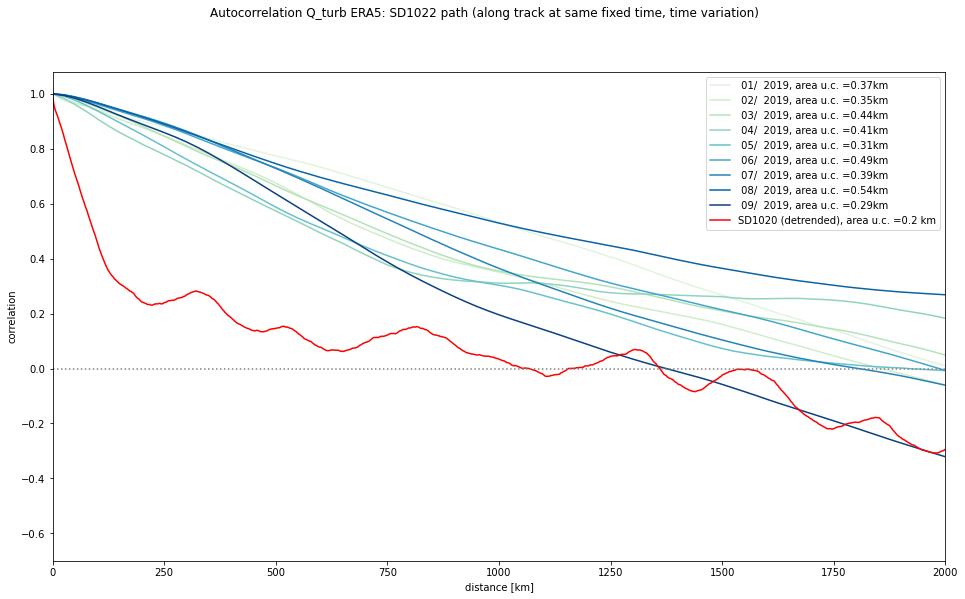

In [446]:
fig=plt.figure(figsize=(16,9))#col=plot_color_gradients('Qualitative')

#colors = list([plt.cm.rainbow(i) for i in range(9)])
n = 10
colors = plt.cm.GnBu(np.linspace(0,1,n))

for i in range(9):
    plt.plot(d_25_22,a_grid25km_22[i], label=' 0%i/  2019, area u.c. ='%(i+1) + str(np.round(area_under_curve_zerocrossing(a_grid1km[i]), 2))+'km' ,linewidth=1.5,c=colors[i+1])#c=(0.2,0.2,(i+1)/10+(i+1)/100),alpha=(i+1)/10)

    
plt.plot(autocorr_22detrend, color='r', label='SD1020 (detrended), area u.c. ='+ str(np.round(area_under_curve_zerocrossing(autocorr_22detrend), 2))+' km')
plt.legend(loc='upper right')
plt.axhline(0,linestyle='dotted', color='grey')
plt.xlim(0,2000)
plt.xlabel('distance [km]')
plt.ylabel('correlation')
fig.suptitle('Autocorrelation Q_turb ERA5: SD1022 path (along track at same fixed time, time variation)')
#plt.savefig("Autocorrlation_Sd1022Q_turb_ onpath_eachmonth.jpg", bbox_inches='tight', transparent=False)
####METHODS : used era5 data, extracted SD path, with nearest grid points, gridded new Qturb to 25km resolution, fixed time but dirrerent 
### SD data is detrended Qturb data

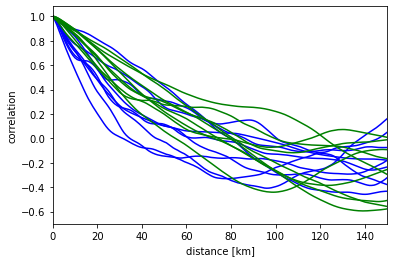

In [410]:
for i in range(9):
    plt.plot(a_grid25km[i], label=' 0%i/ 2019'%(i+1),linewidth=1.5,c='b')#c=(0.2,0.2,(i+1)/10+(i+1)/100),alpha=(i+1)/10)
#colors = plt.cm.(np.linspace(0,1,n))

for i in range(9):
    plt.plot(a_grid25km_22[i], label=' 0%i/ 2019'%(i+1),linewidth=1.5,c='g')#c=(0.2,0.2,(i+1)/10+(i+1)/100),alpha=(i+1)/10)
plt.xlim(0,150)
plt.xlabel('distance [km]')
plt.ylabel('correlation')
#plt.savefig("Autocorrlation_ERA5_green22_blue20_pathsonceamonth.jpg", bbox_inches='tight', transparent=False)

Text(0.5, 0.98, 'Autocorrelation Q_turb ERA5: SD1020 path (along track at same fixed time, time variation)')

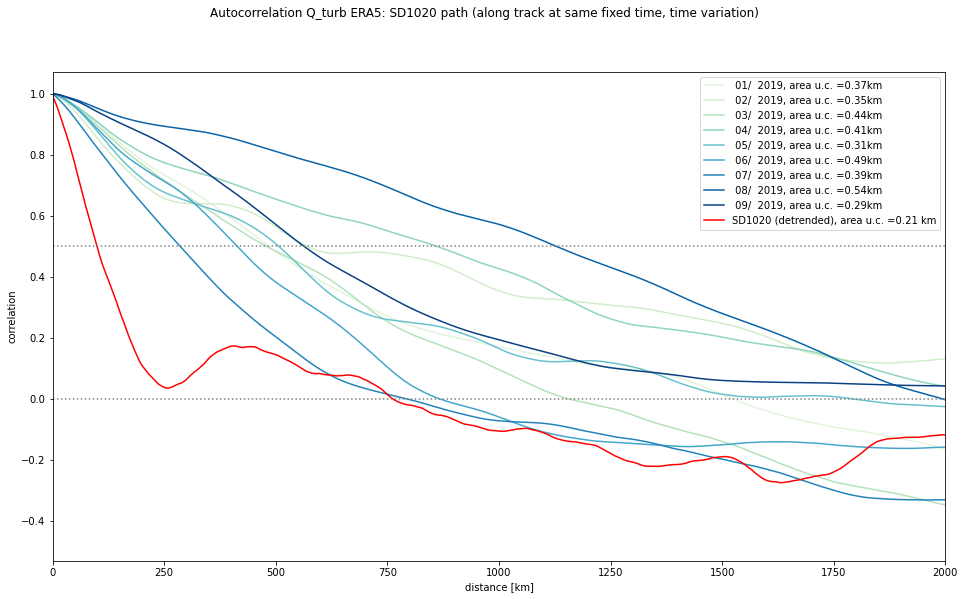

In [444]:
def area_under_curve_zerocrossing(ys):
    
    zero=np.where(np.array(ys) < 0)[0][0]
    xs=np.arange(0, 1, 1/zero)
    return np.trapz(ys[:zero], xs)

fig=plt.figure(figsize=(16,9))#col=plot_color_gradients('Qualitative')

#colors = list([plt.cm.rainbow(i) for i in range(9)])
n = 10
colors = plt.cm.GnBu(np.linspace(0,1,n))

for i in range(9):
    plt.plot(a_grid1km[i], label=' 0%i/  2019, area u.c. ='%(i+1) + str(np.round(area_under_curve_zerocrossing(a_grid1km[i]), 2))+'km' , linewidth=1.5,c=colors[i+1])#c=(0.2,0.2,(i+1)/10+(i+1)/100),alpha=(i+1)/10)
#, label='area u.c.='+ str(np.round(area_under_curve_zerocrossing(autocorr_t0[:200])
    
plt.plot(autocorr_20detrend, color='r', label='SD1020 (detrended), area u.c. ='+ str(np.round(area_under_curve_zerocrossing(autocorr_20detrend), 2))+' km')
plt.legend(loc='upper right')
plt.axhline(0,linestyle='dotted', color='grey')
plt.axhline(0.5,linestyle='dotted', color='grey')

plt.xlim(0,2000)
plt.xlabel('distance [km]')
plt.ylabel('correlation')
#fig.suptitle('Autocorrelation Q_turb ERA5: SD1020 path (along track at same fixed time, time variation)')
#plt.savefig("Autocorrlation_Sd1020Q_turb_ onpath_eachmonth.jpg", bbox_inches='tight', transparent=False)
####METHODS : used era5 data, extracted SD path, with nearest grid points, gridded new Qturb to 25km resolution, fixed time but dirrerent 
### SD data is detrended Qturb data

In [436]:
str(np.round(area_under_curve_zerocrossing(autocorr_20detrend), 2))

'0.21'